<a href="https://colab.research.google.com/github/dhananaidu/MLprojects/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
car = pd.read_csv('car data.csv')

In [4]:
print(car)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

In [8]:
print(car['Selling_type'].unique())
print(car['Fuel_Type'].unique())
print(car['Transmission'].unique())
print(car['Owner'].unique())


['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [9]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
car.duplicated().sum()

2

In [12]:
car.drop_duplicates(inplace=True)

In [13]:
car.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [14]:
car["year"]= pd.to_datetime(car["Year"], format='%Y').dt.year

In [16]:
car["Owner"] = car["Owner"].astype("int32")
car["Driven_kms"] = car["Driven_kms"].astype("int32")

In [17]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int32  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int32  
 9   year           299 non-null    int32  
dtypes: float64(2), int32(3), int64(1), object(4)
memory usage: 22.2+ KB


In [18]:
car['year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int32)

In [21]:
car['year'].nunique()

16

In [23]:
car = car.drop(columns = "Car_Name")

In [24]:
car["current year"] = 2023

In [25]:
car['Age of car'] = car['current year'] = car["Year"]

In [26]:
car

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,year,current year,Age of car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2014,2014,2014
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2013,2013,2013
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2017,2017,2017
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2011,2011,2011
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2014,2014,2014
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2016,2016,2016
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2015,2015,2015
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2009,2009,2009
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2017,2017,2017


In [31]:
car = car.drop(columns=['Age of car'])

In [32]:
car


,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2014
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2013
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2017
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2011
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2014
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,2016
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,2015
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,2009
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,2017


In [34]:
car = pd.get_dummies(data=car, drop_first=True)

In [35]:
car

,Selling_Price,Present_Price,Driven_kms,Owner,year,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2014,False,True,False,True
1,4.75,9.54,43000,0,2013,True,False,False,True
2,7.25,9.85,6900,0,2017,False,True,False,True
3,2.85,4.15,5200,0,2011,False,True,False,True
4,4.60,6.87,42450,0,2014,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,2016,True,False,False,True
297,4.00,5.90,60000,0,2015,False,True,False,True
298,3.35,11.00,87934,0,2009,False,True,False,True
299,11.50,12.50,9000,0,2017,True,False,False,True


In [36]:
g = ['Fuel_Type_Diesel','Fuel_Type_Petrol' , 'Selling_type_Individual' , 'Transmission_Manual']
car[g] = car[g].astype('int')

In [37]:
car.head(3)

,Selling_Price,Present_Price,Driven_kms,Owner,year,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2014,0,1,0,1
1,4.75,9.54,43000,0,2013,1,0,0,1
2,7.25,9.85,6900,0,2017,0,1,0,1


In [38]:
car.corr()

,Selling_Price,Present_Price,Driven_kms,Owner,year,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
Selling_Price,1.000000,0.876305,0.028566,-0.087880,0.234369,0.543541,-0.531636,-0.553851,-0.348869
Present_Price,0.876305,1.000000,0.205224,0.009948,-0.053167,0.464934,-0.456829,-0.511779,-0.334326
Driven_kms,0.028566,0.205224,1.000000,0.089367,-0.525714,0.173295,-0.173595,-0.101030,-0.163881
Owner,-0.087880,0.009948,0.089367,1.000000,-0.181639,-0.051836,0.054102,0.123646,-0.052166
year,0.234369,-0.053167,-0.525714,-0.181639,1.000000,0.056469,-0.052197,-0.036820,0.003434
Fuel_Type_Diesel,0.543541,0.464934,0.173295,-0.051836,0.056469,1.000000,-0.979104,-0.345882,-0.086264
Fuel_Type_Petrol,-0.531636,-0.456829,-0.173595,0.054102,-0.052197,-0.979104,1.000000,0.353865,0.078700
Selling_type_Individual,-0.553851,-0.511779,-0.101030,0.123646,-0.036820,-0.345882,0.353865,1.000000,0.058669
Transmission_Manual,-0.348869,-0.334326,-0.163881,-0.052166,0.003434,-0.086264,0.078700,0.058669,1.000000


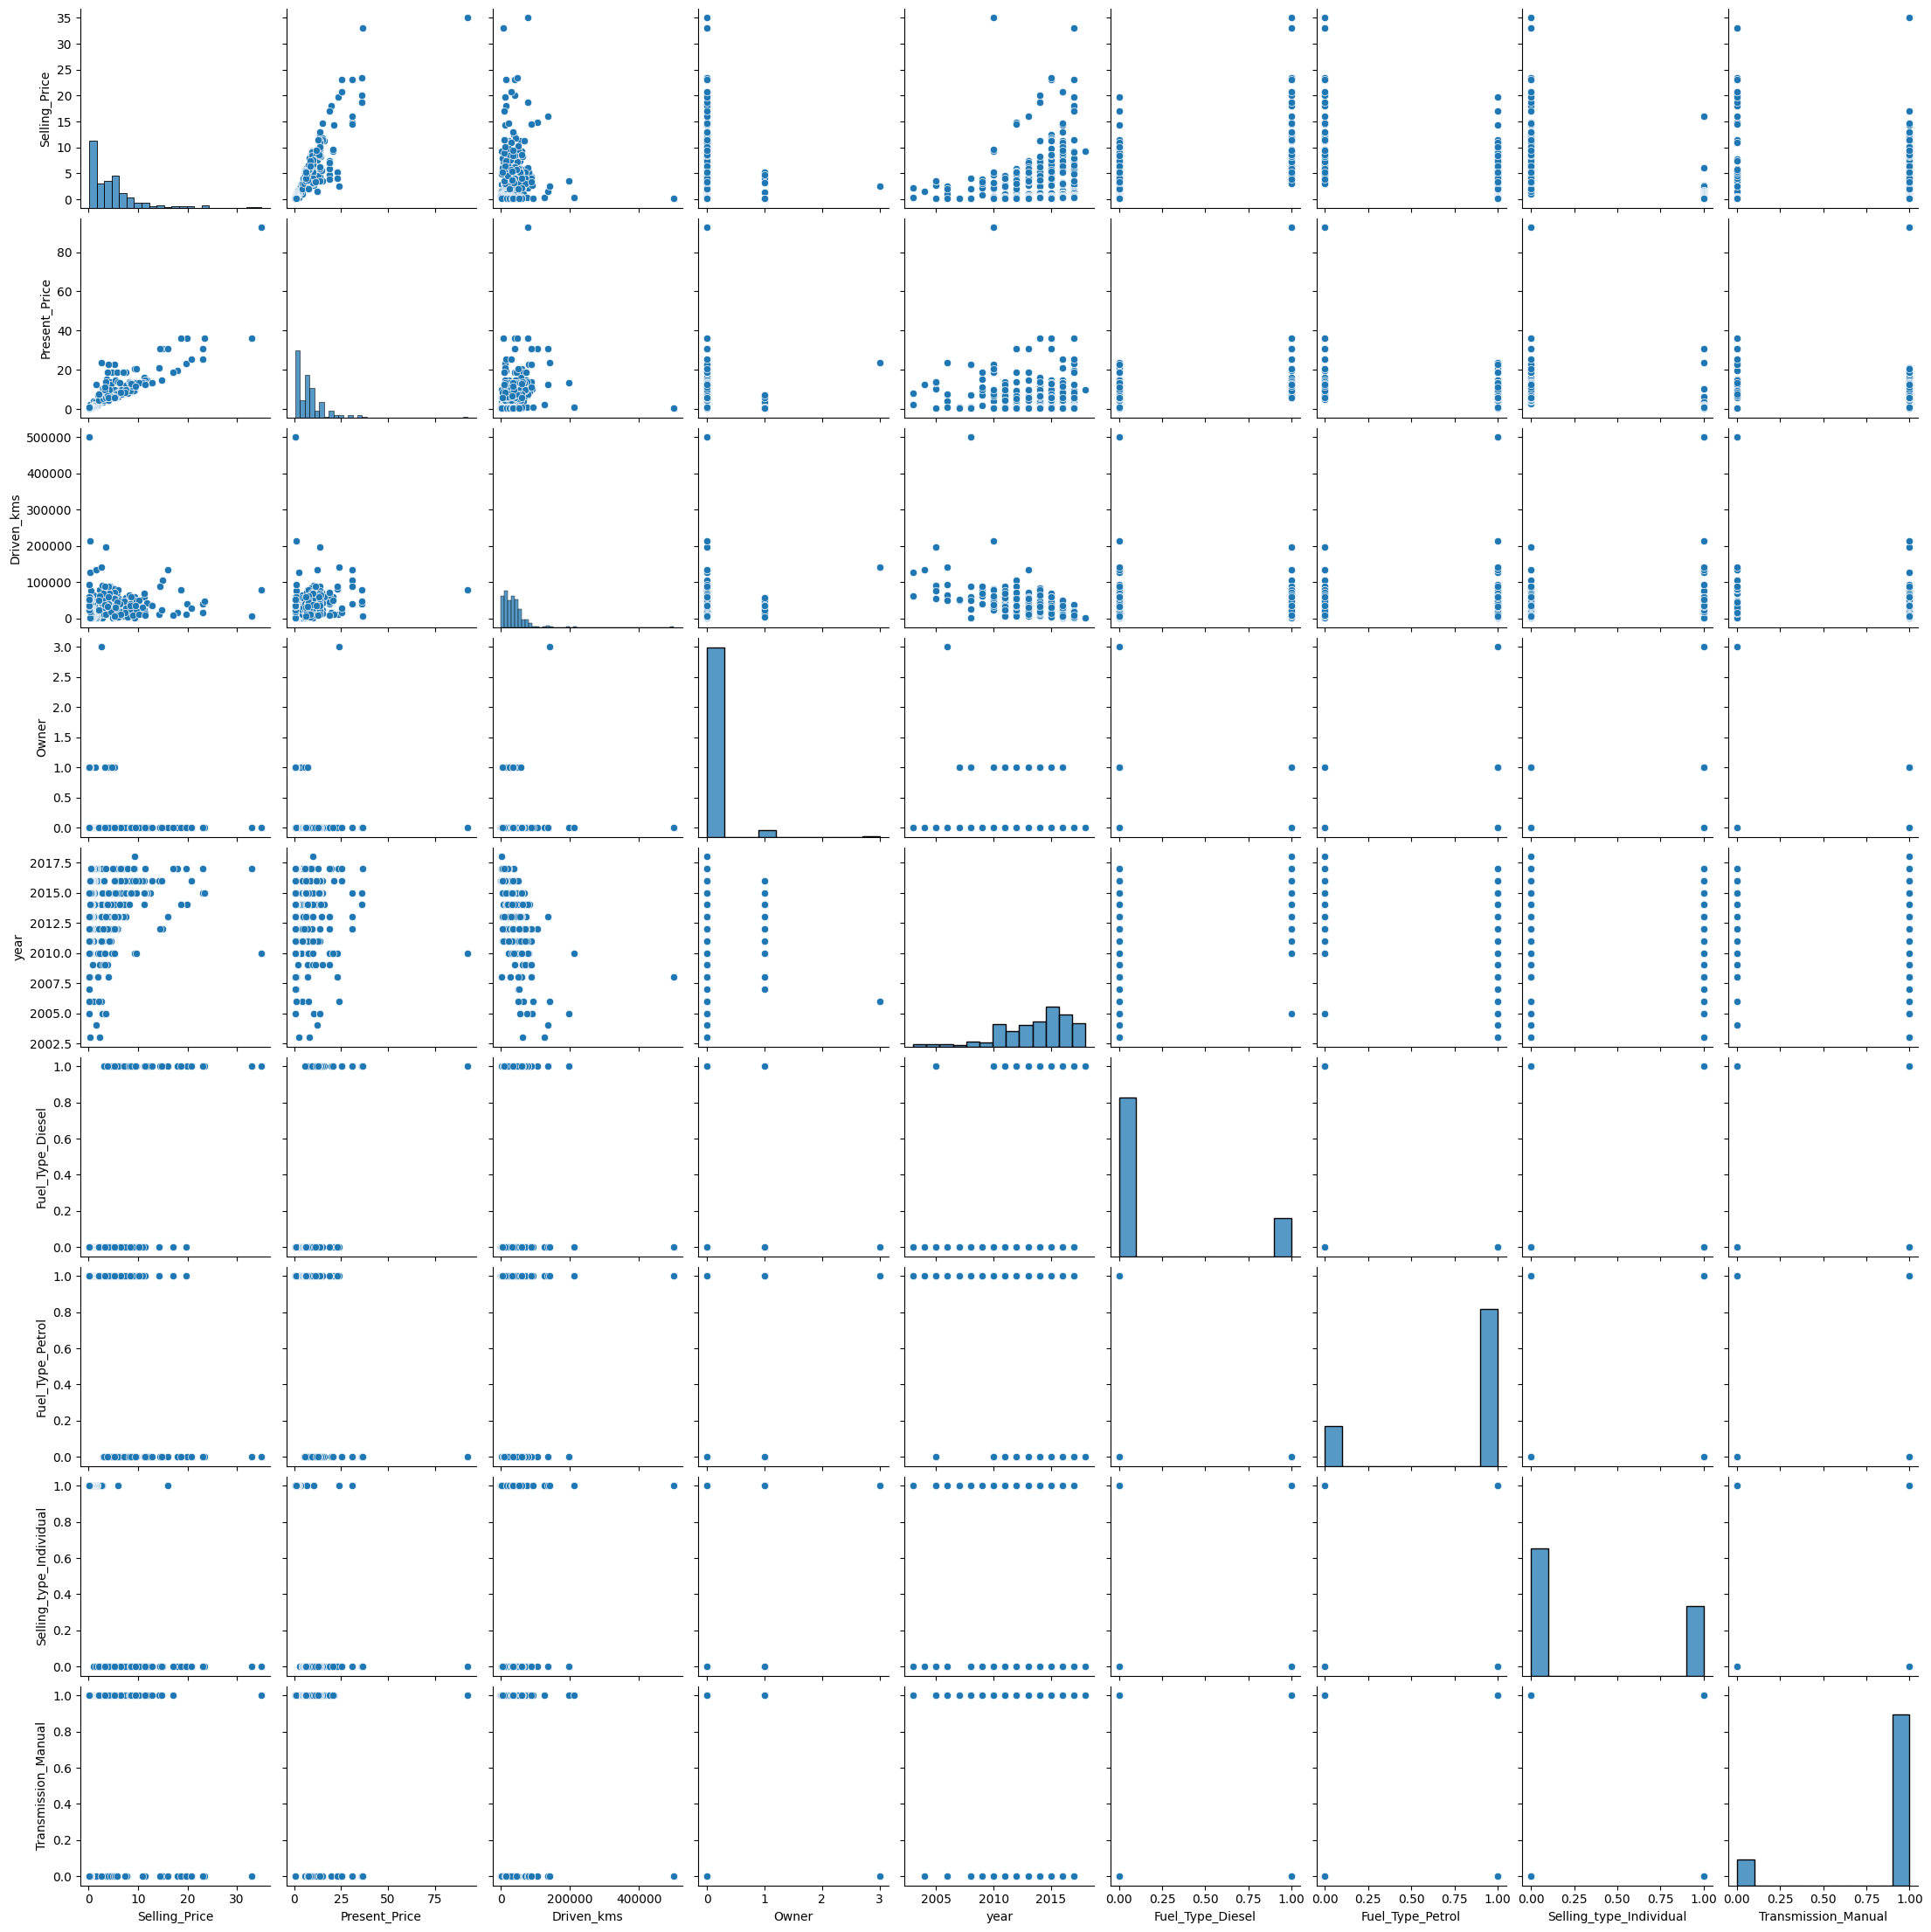

In [39]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(car)

<Axes: >

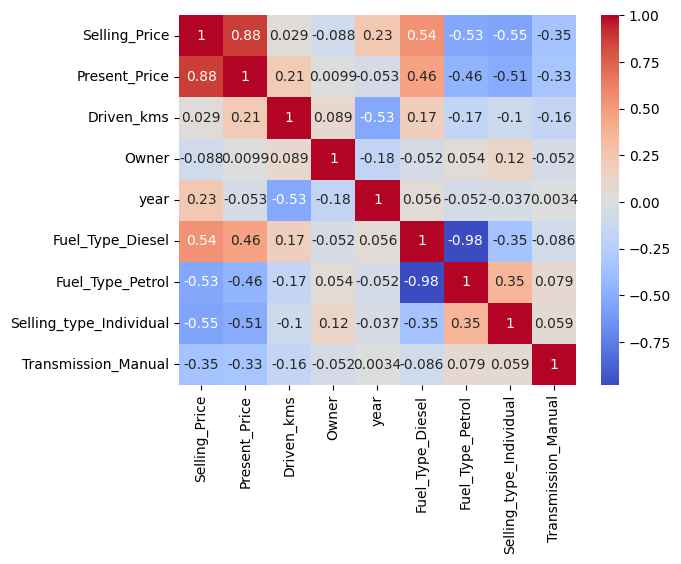

In [40]:
sns.heatmap(car.corr(), annot=True, cmap='coolwarm')

In [41]:
y = car['Selling_Price']
X = car.drop(columns=['Selling_Price'])

In [42]:
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [44]:
X

,Present_Price,Driven_kms,Owner,year,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,5.59,27000,0,2014,0,1,0,1
1,9.54,43000,0,2013,1,0,0,1
2,9.85,6900,0,2017,0,1,0,1
3,4.15,5200,0,2011,0,1,0,1
4,6.87,42450,0,2014,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,2016,1,0,0,1
297,5.90,60000,0,2015,0,1,0,1
298,11.00,87934,0,2009,0,1,0,1
299,12.50,9000,0,2017,1,0,0,1


In [45]:
X['Owner'].unique()

array([0, 1, 3], dtype=int32)

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [47]:
print(model.feature_importances_)

[0.45423589 0.04195306 0.00094526 0.08541826 0.08245878 0.02464232
 0.23090524 0.07944119]


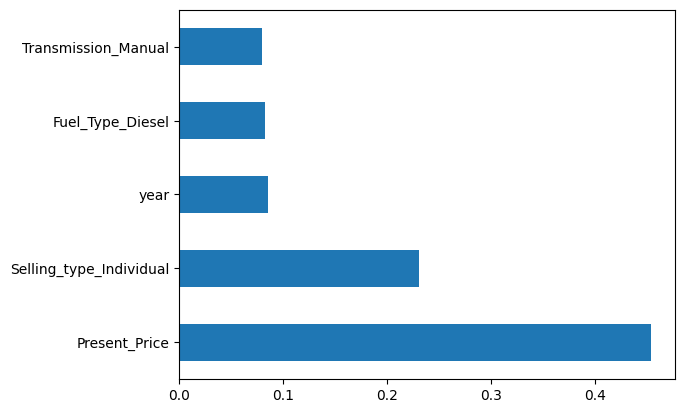

In [48]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [50]:
X_train.shape

(239, 8)

In [51]:
X_test.shape

(60, 8)

In [52]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
ypred = regressor.predict(X_test)

In [55]:
ypred

array([ 0.2285,  7.1745,  2.54  ,  1.4616,  4.326 , 15.6279,  4.1645,
        0.5546, 14.3874,  1.215 ,  2.9955,  0.2145, 21.5023,  2.97  ,
        1.7505,  2.4455,  4.672 , 19.7522,  7.3978,  7.2444,  6.8515,
        1.2459, 10.419 ,  4.2367,  0.6336,  5.0735,  3.281 , 19.9245,
       11.7657,  0.2666,  6.8589,  1.0436,  2.918 ,  2.531 ,  4.147 ,
        4.645 ,  4.3025,  0.2082,  4.8371,  0.4575,  5.7456,  6.5845,
       14.8638,  3.6615,  5.4375,  1.0406,  1.5655,  6.055 ,  5.1795,
        9.206 ,  4.447 , 11.9863,  6.0564,  7.3998,  0.8112,  1.193 ,
        2.8135,  7.2875,  2.55  ,  0.5933])

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.9084112572542694

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
parameters = {
    "n_estimators" : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    "criterion": ["squared_error", "absolute_error", "poisson", "friedman_mse"],
    "max_depth": [10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10, 20, 50],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": ["auto", "sqrt", "log2"],
}

In [68]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [69]:
random_cv = RandomizedSearchCV(estimator=regressor, param_distributions=parameters, n_iter=100, cv=3, verbose=2, random_state=100, n_jobs=-1)

In [70]:
random_cv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=100, verbose=2)

In [71]:
random_cv.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 30,
 'criterion': 'squared_error'}

In [72]:
random_cv.best_score_

0.8212424941452975

In [73]:
predictions = random_cv.predict(X_test)

<Axes: ylabel='Density'>

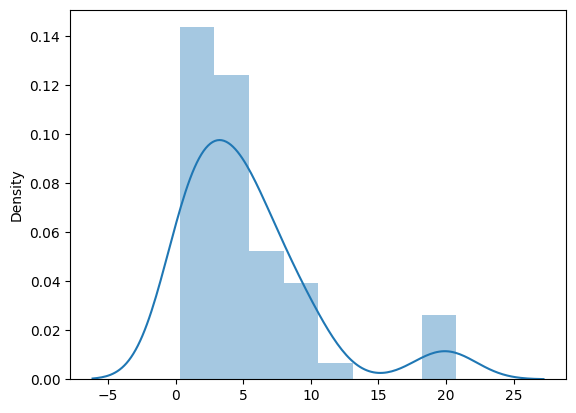

In [77]:
sns.distplot(predictions)

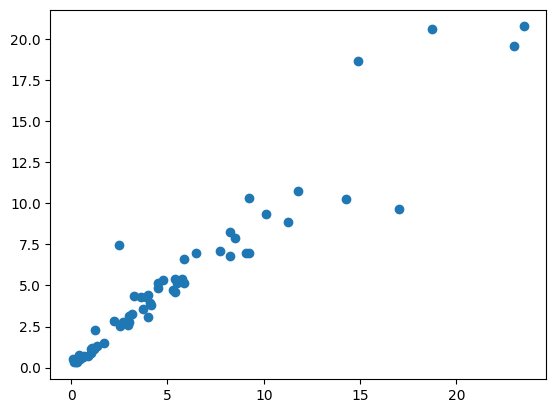

In [78]:
plt.scatter(y_test, predictions)

In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.9206620579965235
MSE: 2.6874218794728133
RMSE 1.6393358043649304


In [83]:
X.head(3)

,Present_Price,Driven_kms,Owner,year,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,5.59,27000,0,2014,0,1,0,1
1,9.54,43000,0,2013,1,0,0,1
2,9.85,6900,0,2017,0,1,0,1


In [85]:
single_ob = np.array([9.5, 15000, 0.0, 5.0, 1.0, 0.0, 0.0 , 1.0])
single_ob = single_ob.reshape(1, -1)

In [86]:
regressor.predict(single_ob)

array([3.384])